In [143]:
import pandas as pd
import matplotlib.pyplot as plt

In [144]:
def add_StructureType(df:pd.DataFrame, column = 'name'):
    type_dict = {'RSM': 'RSM', 'lin': 'type2', 'str': 'type3'}
    for i, row in df.iterrows():
        name = row[column]
        name_start = name[:3]
        if name_start in type_dict.keys():
            df.at[i, 'type'] = type_dict[name_start]
        elif name.endswith('opt_charge'):
            df.at[i, 'type'] = 'opt_charge'
        else:
            print(f'Unknown type of {name} (not in type dict {list(type_dict.keys())})')
            df.at[i, 'type'] = 'Unknown'
    
    return df

In [145]:
FILE = '20250508_1508_predictions_all.csv'
df = pd.read_csv(FILE)
print(len(df))
df = add_StructureType(df)
df.sample(10)

765
Unknown type of HAWWOT_clean (not in type dict ['RSM', 'lin', 'str'])
Unknown type of FECXAO_clean (not in type dict ['RSM', 'lin', 'str'])
Unknown type of YEKWOC_clean (not in type dict ['RSM', 'lin', 'str'])
Unknown type of COCMUE_clean (not in type dict ['RSM', 'lin', 'str'])
Unknown type of HOTWUJ_clean (not in type dict ['RSM', 'lin', 'str'])
Unknown type of BABRII (not in type dict ['RSM', 'lin', 'str'])
Unknown type of RUSWIN_clean (not in type dict ['RSM', 'lin', 'str'])
Unknown type of QERZUI (not in type dict ['RSM', 'lin', 'str'])
Unknown type of ddmof_23639 (not in type dict ['RSM', 'lin', 'str'])
Unknown type of GUHNUU (not in type dict ['RSM', 'lin', 'str'])
Unknown type of FEYJOJ (not in type dict ['RSM', 'lin', 'str'])
Unknown type of RASKIH_clean (not in type dict ['RSM', 'lin', 'str'])
Unknown type of PEGPUO_clean (not in type dict ['RSM', 'lin', 'str'])
Unknown type of CALF20 (not in type dict ['RSM', 'lin', 'str'])
Unknown type of IMISIH_clean (not in type dict 

,Unnamed: 0,name,descriptors,all_predictions,temperature_prediction,temperature_prediction_certainty,time_prediction,time_prediction_certainty,solvent_prediction,solvent_prediction_certainty,additive_prediction,additive_prediction_certainty,type
407,407,RSM2873,True,"[['121', 'high'], ['70', 'high'], ['N,N-dimeth...",121.0,high,70.0,high,"N,N-dimethylformamide",high,Neutral/none,high,RSM
495,495,RSM0462,True,"[['120', 'high'], ['70', 'high'], ['Water', 'h...",120.0,high,70.0,high,Water,high,Neutral/none,high,RSM
370,370,RSM1254,True,"[['116', 'high'], ['56', 'medium'], ['N,N-dime...",116.0,high,56.0,medium,"N,N-dimethylformamide",high,Neutral/none,high,RSM
714,714,FIZPOV,True,"[['126', 'low'], ['55', 'medium'], ['N,N-dimet...",126.0,low,55.0,medium,"N,N-dimethylformamide",high,Neutral/none,high,Unknown
623,623,RSM0290,True,"[['111', 'high'], ['73', 'medium'], ['Water', ...",111.0,high,73.0,medium,Water,high,Neutral/none,high,RSM
594,594,XUVHEB,True,"[['116', 'high'], ['69', 'high'], ['N,N-dimeth...",116.0,high,69.0,high,"N,N-dimethylformamide",high,Neutral/none,high,Unknown
610,610,CAU10,True,"[['128', 'medium'], ['86', 'medium'], ['N,N-di...",128.0,medium,86.0,medium,"N,N-dimethylformamide",high,Neutral/none,high,Unknown
680,680,RSM4258,True,"[['116', 'high'], ['62', 'high'], ['N,N-dimeth...",116.0,high,62.0,high,"N,N-dimethylformamide",high,Neutral/none,high,RSM
200,200,RSM0068,True,"[['119', 'medium'], ['95', 'medium'], ['Water'...",119.0,medium,95.0,medium,Water,high,Neutral/none,high,RSM
148,148,YUGLES,True,"[['82', 'high'], ['43', 'high'], ['N,N-dimethy...",82.0,high,43.0,high,"N,N-dimethylformamide",high,Acid,medium,Unknown


In [146]:
df_duplicates = df.drop_duplicates(subset='name')
len(df_duplicates)

765

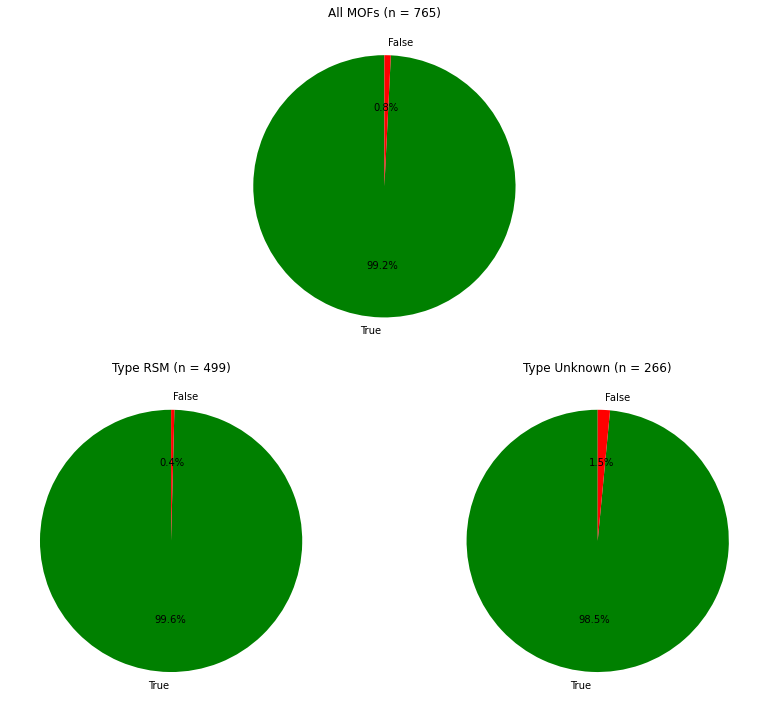

In [147]:
# Color mapping
color_map = {True: 'green', False: 'red'}

# Count for the whole dataset
total_counts = df['descriptors'].value_counts().reindex([True, False], fill_value=0)

# Get unique types
types = df['type'].unique()

# Set up a grid: 2 rows (1 big pie chart, then type pie charts)
fig = plt.figure(figsize=(6 * max(2, len(types)), 10))

# --- Big pie chart for all data ---
ax_main = plt.subplot2grid((2, len(types)), (0, 0), colspan=len(types))
ax_main.pie(
    total_counts,
    labels=['True', 'False'],
    colors=[color_map[True], color_map[False]],
    autopct='%1.1f%%',
    startangle=90
)
ax_main.set_title(f'All MOFs (n = {len(df)})')

# --- Smaller pie charts per type ---
for i, t in enumerate(types):
    ax = plt.subplot2grid((2, len(types)), (1, i))
    subset = df[df['type'] == t]
    counts = subset['descriptors'].value_counts().reindex([True, False], fill_value=0)

    ax.pie(
        counts,
        labels=['True', 'False'],
        colors=[color_map[True], color_map[False]],
        autopct='%1.1f%%',
        startangle=90
    )
    ax.set_title(f"Type {t} (n = {len(subset)})")

plt.tight_layout()
plt.show()

## Predictions

In [148]:
df_true = df[df['descriptors'] == True]
print(len(df_true))
display(df_true)


759


,Unnamed: 0,name,descriptors,all_predictions,temperature_prediction,temperature_prediction_certainty,time_prediction,time_prediction_certainty,solvent_prediction,solvent_prediction_certainty,additive_prediction,additive_prediction_certainty,type
0,0,RSM4338,True,"[['115', 'medium'], ['65', 'high'], ['Water', ...",115.0,medium,65.0,high,Water,high,Neutral/none,high,RSM
1,1,HAWWOT_clean,True,"[['119', 'high'], ['62', 'high'], ['N,N-dimeth...",119.0,high,62.0,high,"N,N-dimethylformamide",high,Neutral/none,high,Unknown
2,2,RSM2517,True,"[['112', 'high'], ['67', 'high'], ['Water', 'h...",112.0,high,67.0,high,Water,high,Neutral/none,high,RSM
3,3,RSM1877,True,"[['116', 'high'], ['67', 'high'], ['Water', 'h...",116.0,high,67.0,high,Water,high,Neutral/none,high,RSM
4,4,RSM0844,True,"[['148', 'medium'], ['83', 'medium'], ['Water'...",148.0,medium,83.0,medium,Water,high,Neutral/none,high,RSM
...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,760,NOCKOG_clean,True,"[['117', 'high'], ['77', 'high'], ['N,N-dimeth...",117.0,high,77.0,high,"N,N-dimethylformamide",high,Neutral/none,high,Unknown
761,761,RSM4294,True,"[['119', 'high'], ['69', 'high'], ['N,N-dimeth...",119.0,high,69.0,high,"N,N-dimethylformamide",high,Neutral/none,high,RSM
762,762,ddmof_16703,True,"[['122', 'high'], ['62', 'high'], ['N,N-dimeth...",122.0,high,62.0,high,"N,N-dimethylformamide",high,Neutral/none,high,Unknown
763,763,LUFNEG_clean,True,"[['111', 'high'], ['67', 'high'], ['N,N-dimeth...",111.0,high,67.0,high,"N,N-dimethylformamide",high,Neutral/none,high,Unknown


In [149]:
import matplotlib.pyplot as plt

def plot_continuous_prediction_with_certainty(df, prediction_col, certainty_col, xlabel):
    """
    Plots a histogram of the prediction and a pie chart of certainty levels.
    
    Parameters:
    - df: DataFrame
    - prediction_col: name of the prediction column (continuous values)
    - certainty_col: name of the certainty column (categorical: High, Medium, Low)
    - xlabel: label for the x-axis of the histogram
    """
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # --- Histogram ---
    df[prediction_col].plot(
        kind='hist',
        bins=10,
        color='skyblue',
        edgecolor='black',
        density=False,
        ax=axes[0]
    )

    axes[0].set_title(f'{prediction_col.replace("_", " ").title()} (n = {len(df)})', fontsize=16)
    axes[0].set_xlabel(xlabel, fontsize=14)
    axes[0].set_ylabel('Count', fontsize=14)
    axes[0].grid(alpha=0.3)

    # --- Pie chart ---
    certainty_counts = df[certainty_col].value_counts()
    certainty_order = ['high', 'medium', 'low']
    certainty_counts = certainty_counts.reindex(certainty_order).fillna(0)
    colors = ['green', 'orange', 'red']

    axes[1].pie(
        certainty_counts,
        labels=certainty_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors
    )
    axes[1].set_title(f'{prediction_col.replace("_", " ").title()} Certainty', fontsize=16)

    plt.tight_layout()
    plt.show()



def plot_categorical_prediction_with_certainty(df, prediction_col, certainty_col, xlabel='Prediction'):
    """
    Plots a bar chart of the categorical prediction counts and a pie chart of certainty levels.
    
    Parameters:
    - df: DataFrame
    - prediction_col: name of the prediction column (categorical)
    - certainty_col: name of the certainty column (categorical: High, Medium, Low)
    - xlabel: label for the x-axis of the bar chart
    """
    counts = df[prediction_col].value_counts()

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # --- Bar plot ---
    counts.plot(
        kind='bar',
        color='skyblue',
        edgecolor='black',
        ax=axes[0]
    )

    axes[0].set_title(f'{prediction_col.replace("_", " ").title()} (n = {len(df)})', fontsize=16)
    axes[0].set_xlabel(xlabel, fontsize=14)
    axes[0].set_ylabel('Count', fontsize=14)
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].grid(axis='y', alpha=0.3)

    # --- Pie chart ---
    certainty_counts = df[certainty_col].value_counts()
    certainty_order = ['high', 'medium', 'low']
    certainty_counts = certainty_counts.reindex(certainty_order).fillna(0)

    colors = ['green', 'orange', 'red']

    if certainty_counts.sum() > 0:
        axes[1].pie(
            certainty_counts,
            labels=certainty_counts.index,
            autopct='%1.1f%%',
            startangle=90,
            colors=colors
        )
        axes[1].set_title(f'{prediction_col.replace("_", " ").title()} Certainty', fontsize=16)
    else:
        axes[1].text(0.5, 0.5, 'No certainty data available', 
                     ha='center', va='center', fontsize=14)
        axes[1].axis('off')

    plt.tight_layout()
    plt.show()


### Temperature

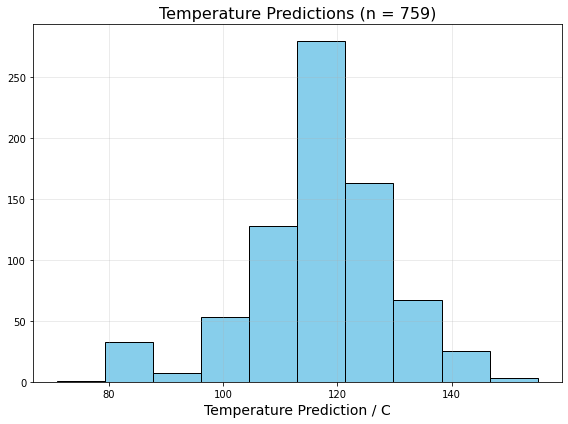

In [150]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
df_true['temperature_prediction'].hist(
    #bins=5,
    color='skyblue',
    edgecolor='black',
    density=False
)

plt.title(f'Temperature Predictions (n = {len(df_true)})', fontsize=16)
plt.xlabel('Temperature Prediction / C', fontsize=14)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


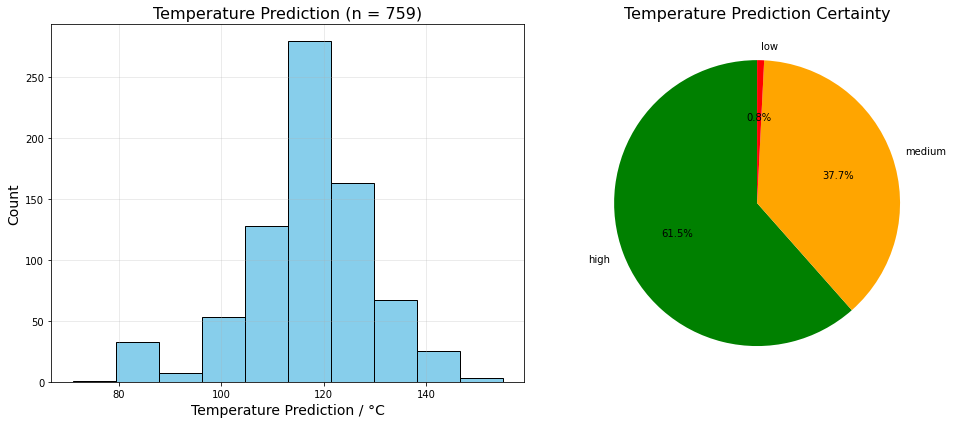

In [151]:
plot_continuous_prediction_with_certainty(
    df_true, 
    prediction_col='temperature_prediction', 
    certainty_col='temperature_prediction_certainty',
    xlabel='Temperature Prediction / °C'
)

### Time

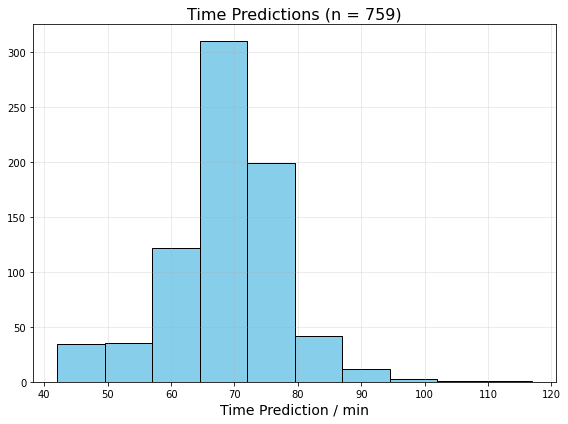

In [152]:
plt.figure(figsize=(8, 6))
df['time_prediction'].hist(
    #bins=5,
    color='skyblue',
    edgecolor='black',
    density=False
)

plt.title(f'Time Predictions (n = {len(df_true)})', fontsize=16)
plt.xlabel('Time Prediction / min', fontsize=14)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


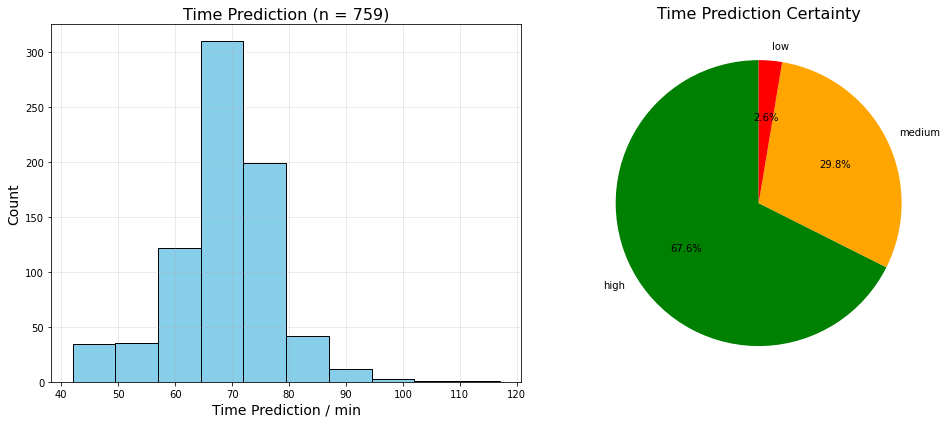

In [153]:
plot_continuous_prediction_with_certainty(
    df_true, 
    prediction_col='time_prediction', 
    certainty_col='time_prediction_certainty',
    xlabel='Time Prediction / min'
)

### Solvent

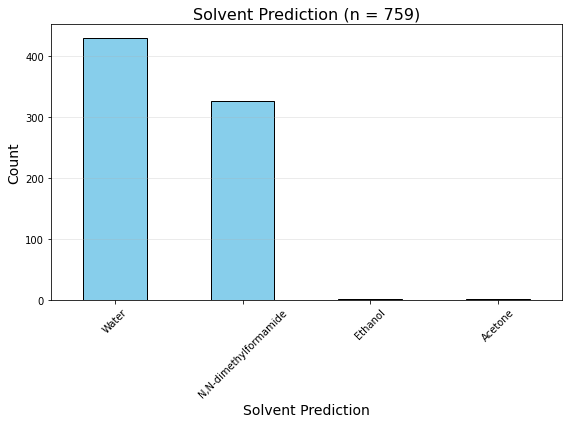

In [154]:
# Get value counts sorted from highest to lowest
counts = df_true['solvent_prediction'].value_counts()

plt.figure(figsize=(8, 6))
counts.plot(
    kind='bar',
    color='skyblue',
    edgecolor='black'
)

plt.title(f'Solvent Prediction (n = {len(df_true)})', fontsize=16)
plt.xlabel('Solvent Prediction', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


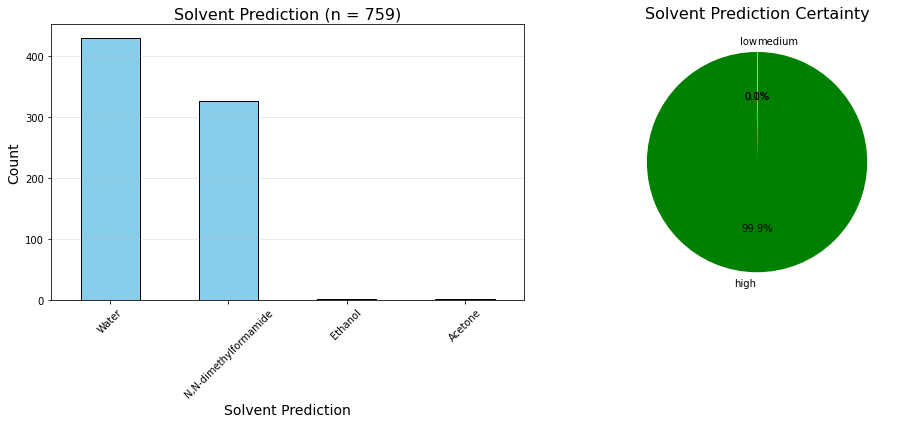

In [155]:
plot_categorical_prediction_with_certainty(
    df_true,
    prediction_col='solvent_prediction',
    certainty_col='solvent_prediction_certainty',
    xlabel='Solvent Prediction'
)



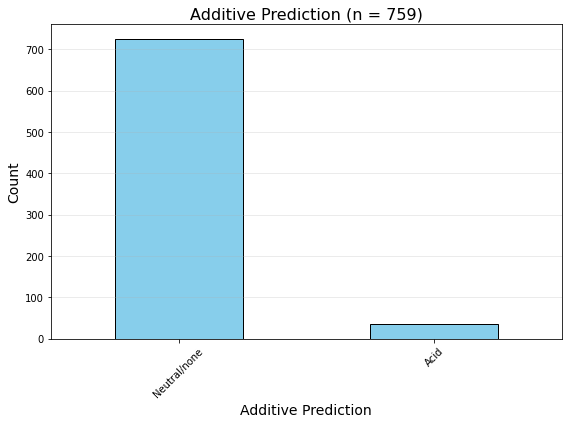

In [156]:
# Get value counts sorted from highest to lowest
counts = df_true['additive_prediction'].value_counts()

plt.figure(figsize=(8, 6))
counts.plot(
    kind='bar',
    color='skyblue',
    edgecolor='black'
)

plt.title(f'Additive Prediction (n = {len(df_true)})', fontsize=16)
plt.xlabel('Additive Prediction', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

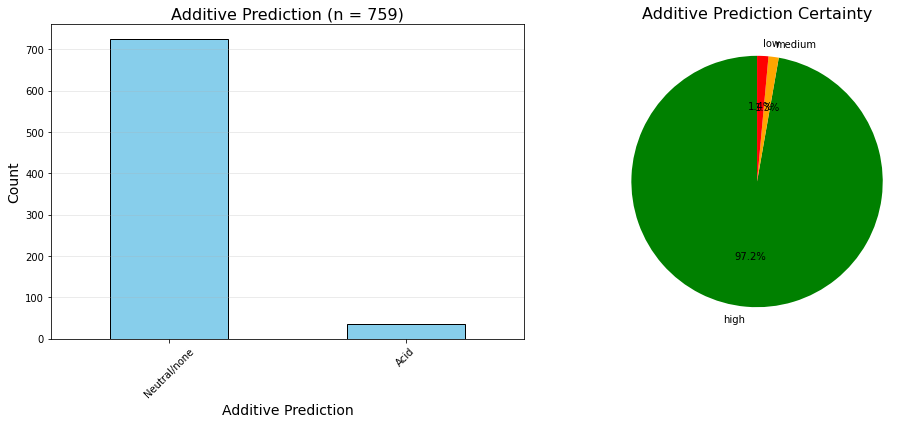

In [157]:
# For additive
plot_categorical_prediction_with_certainty(
    df_true,
    prediction_col='additive_prediction',
    certainty_col='additive_prediction_certainty',
    xlabel='Additive Prediction'
)
